In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScalerq

In [6]:
df = pd.read_csv ('iot_attk_ml.csv')

In [7]:
df.head()

,Year,Attack_ID,Attack_Name,Reason for Attack,Attack_1,Attack_2,Attack_3,Solution_1,Solution_2,Solution_3,Solution_4,Solution_5,Solution_6,Solution_7
0,2020,Attack 1,EternalBlue IoT Attack,Exploited SMB vulnerability in legacy IoT devi...,ioT Attack,Vulnerabilities,Not Applicable,Patching,NaN,Updates,NaN,network segmentation,NaN,NaN
1,2020,Attack 2,Android IoT Botnet,Botnet using IoT devices to distribute malware...,Botnet,Not Applicable,Not Applicable,Patching,NaN,Updates,NaN,authentication,NaN,NaN
2,2020,Attack 3,"RCE in Smart Cameras (Ring, Wyze)",Remote Code Execution vulnerabilities in smart...,Remote Code Execution,Vulnerabilities,Not Applicable,Patching,NaN,disable ports,NaN,network monitoring,NaN,NaN
3,2021,Attack 4,Colonial Pipeline Ransomware Attack,Attack on energy infrastructure (IoT connected...,Ransomware,Not Applicable,Not Applicable,Isolation,NaN,Ransom,NaN,NaN,NaN,NaN
4,2021,Attack 5,Reolink Camera Botnet,IoT devices used to create a botnet for DDoS a...,Botnet,DDoS,Not Applicable,Patching,NaN,Authentication,NaN,network monitoring,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               38 non-null     int64 
 1   Attack_ID          38 non-null     object
 2   Attack_Name        38 non-null     object
 3   Reason for Attack  38 non-null     object
 4   Attack_1           38 non-null     object
 5   Attack_2           38 non-null     object
 6   Attack_3           38 non-null     object
 7   Solution_1         36 non-null     object
 8   Solution_2         3 non-null      object
 9   Solution_3         33 non-null     object
 10  Solution_4         1 non-null      object
 11  Solution_5         28 non-null     object
 12  Solution_6         2 non-null      object
 13  Solution_7         4 non-null      object
dtypes: int64(1), object(13)
memory usage: 4.3+ KB


In [9]:
df_blank = df.fillna(value='not applicable')
print(df_blank)

    Year  Attack_ID                                        Attack_Name  \
0   2020   Attack 1                             EternalBlue IoT Attack   
1   2020   Attack 2                                 Android IoT Botnet   
2   2020   Attack 3                  RCE in Smart Cameras (Ring, Wyze)   
3   2021   Attack 4                Colonial Pipeline Ransomware Attack   
4   2021   Attack 5                              Reolink Camera Botnet   
5   2021   Attack 6               Volkswagen IoT Exploit (Car Hacking)   
6   2021   Attack 7                        Zoombombing via IoT Devices   
7   2022   Attack 8                              Casper IoT Ransomware   
8   2022   Attack 9         Hack of IoT Devices in Hospitals (Medjack)   
9   2022  Attack 10            Ransomware Attack on IoT Infrastructure   
10  2022  Attack 11                      MedeAnalytics IoT Data Breach   
11  2023  Attack 12           Malicious Firmware Attack on IoT Devices   
12  2023  Attack 13                   

In [15]:
# categories for different iot attacks used

dist_attck1 = df['Attack_1'].unique()
distcount_attck1 = df['Attack_1'].nunique()
print("Categories:", dist_attck1)
print("Categories count:", distcount_attck1)

dist_attck2 = df['Attack_2'].unique()
distcount_attck2 = df['Attack_2'].nunique()
print("Categories:", dist_attck2)
print("Categories count:", distcount_attck2)

dist_attck3 = df['Attack_3'].unique()
distcount_attck3 = df['Attack_3'].nunique()
print("Categories:", dist_attck3)
print("Categories count:", distcount_attck3)

dist_attck3 = df['Attack_3'].unique()
distcount_attck3 = df['Attack_3'].nunique()
print("Categories:", dist_attck3)
print("Categories count:", distcount_attck3)

Categories: ['ioT Attack' 'Botnet' 'Remote Code Execution' 'Ransomware' 'Exploit'
 'Breach' 'Vulnerabilities' 'Malware' 'DDoS' 'Hack' 'IoT Attack' 'Worm'
 'Virus']
Categories count: 13
Categories: ['Vulnerabilities' 'Not Applicable' 'DDoS' 'Hack' 'Botnet' 'DDos' 'Worm']
Categories count: 7
Categories: ['Not Applicable' 'Hack' 'Breach' 'Vulnerabilities' 'DDoS']
Categories count: 5
Categories: ['Not Applicable' 'Hack' 'Breach' 'Vulnerabilities' 'DDoS']
Categories count: 5


In [17]:
# categories for solutions deployed/used


dist_sol1 = df['Solution_1'].unique()
distcount_sol1 = df['Solution_1'].nunique()
print("Categories:", dist_sol1)
print("Categories count:", distcount_sol1)

dist_sol2 = df['Solution_2'].unique()
distcount_sol2 = df['Solution_2'].nunique()
print("Categories:", dist_sol2)
print("Categories count:", distcount_sol2)

dist_sol3 = df['Solution_3'].unique()
distcount_sol3 = df['Solution_3'].nunique()
print("Categories:", dist_sol3)
print("Categories count:", distcount_sol3)

dist_sol4 = df['Solution_4'].unique()
distcount_sol4 = df['Solution_4'].nunique()
print("Categories:", dist_sol4)
print("Categories count:", distcount_sol4)

dist_sol5 = df['Solution_5'].unique()
distcount_sol5 = df['Solution_5'].nunique()
print("Categories:", dist_sol5)
print("Categories count:", distcount_sol5)

dist_sol6 = df['Solution_6'].unique()
distcount_sol6 = df['Solution_6'].nunique()
print("Categories:", dist_sol6)
print("Categories count:", distcount_sol6)

dist_sol7 = df['Solution_7'].unique()
distcount_sol7 = df['Solution_7'].nunique()
print("Categories:", dist_sol7)
print("Categories count:", distcount_sol7)

Categories: ['Patching' 'Isolation' 'Updates' 'Encryption' 'Segmentation' 'backup'
 'Audits' 'passwords' nan 'Network Segmentation' 'Recalls'
 'Antivirus detection']
Categories count: 11
Categories: [nan 'Hardening' 'Malware detection']
Categories count: 2
Categories: ['Updates' 'disable ports' 'Ransom' 'Authentication' 'Patching'
 'monitoring' nan 'Monitoring' 'isolation' 'alerting' 'MFA'
 'network isolation' 'updates' 'encryption' 'authentication' 'passwords'
 'patching' 'backup' 'filtering' 'antivirus']
Categories count: 19
Categories: [nan 'firewall']
Categories count: 1
Categories: ['network segmentation' 'authentication' 'network monitoring' nan
 'encryption' 'patching' 'isolation' 'MFA' 'Updates'
 ' network security protocols' 'monitoring' 'access coontrol' 'updates'
 'passwords' 'backups' 'endpoint security' 'filtering' 'audits']
Categories count: 17
Categories: [nan 'authentication' 'anomaly detection']
Categories count: 2
Categories: [nan ' patching' ' hardware replacements' 

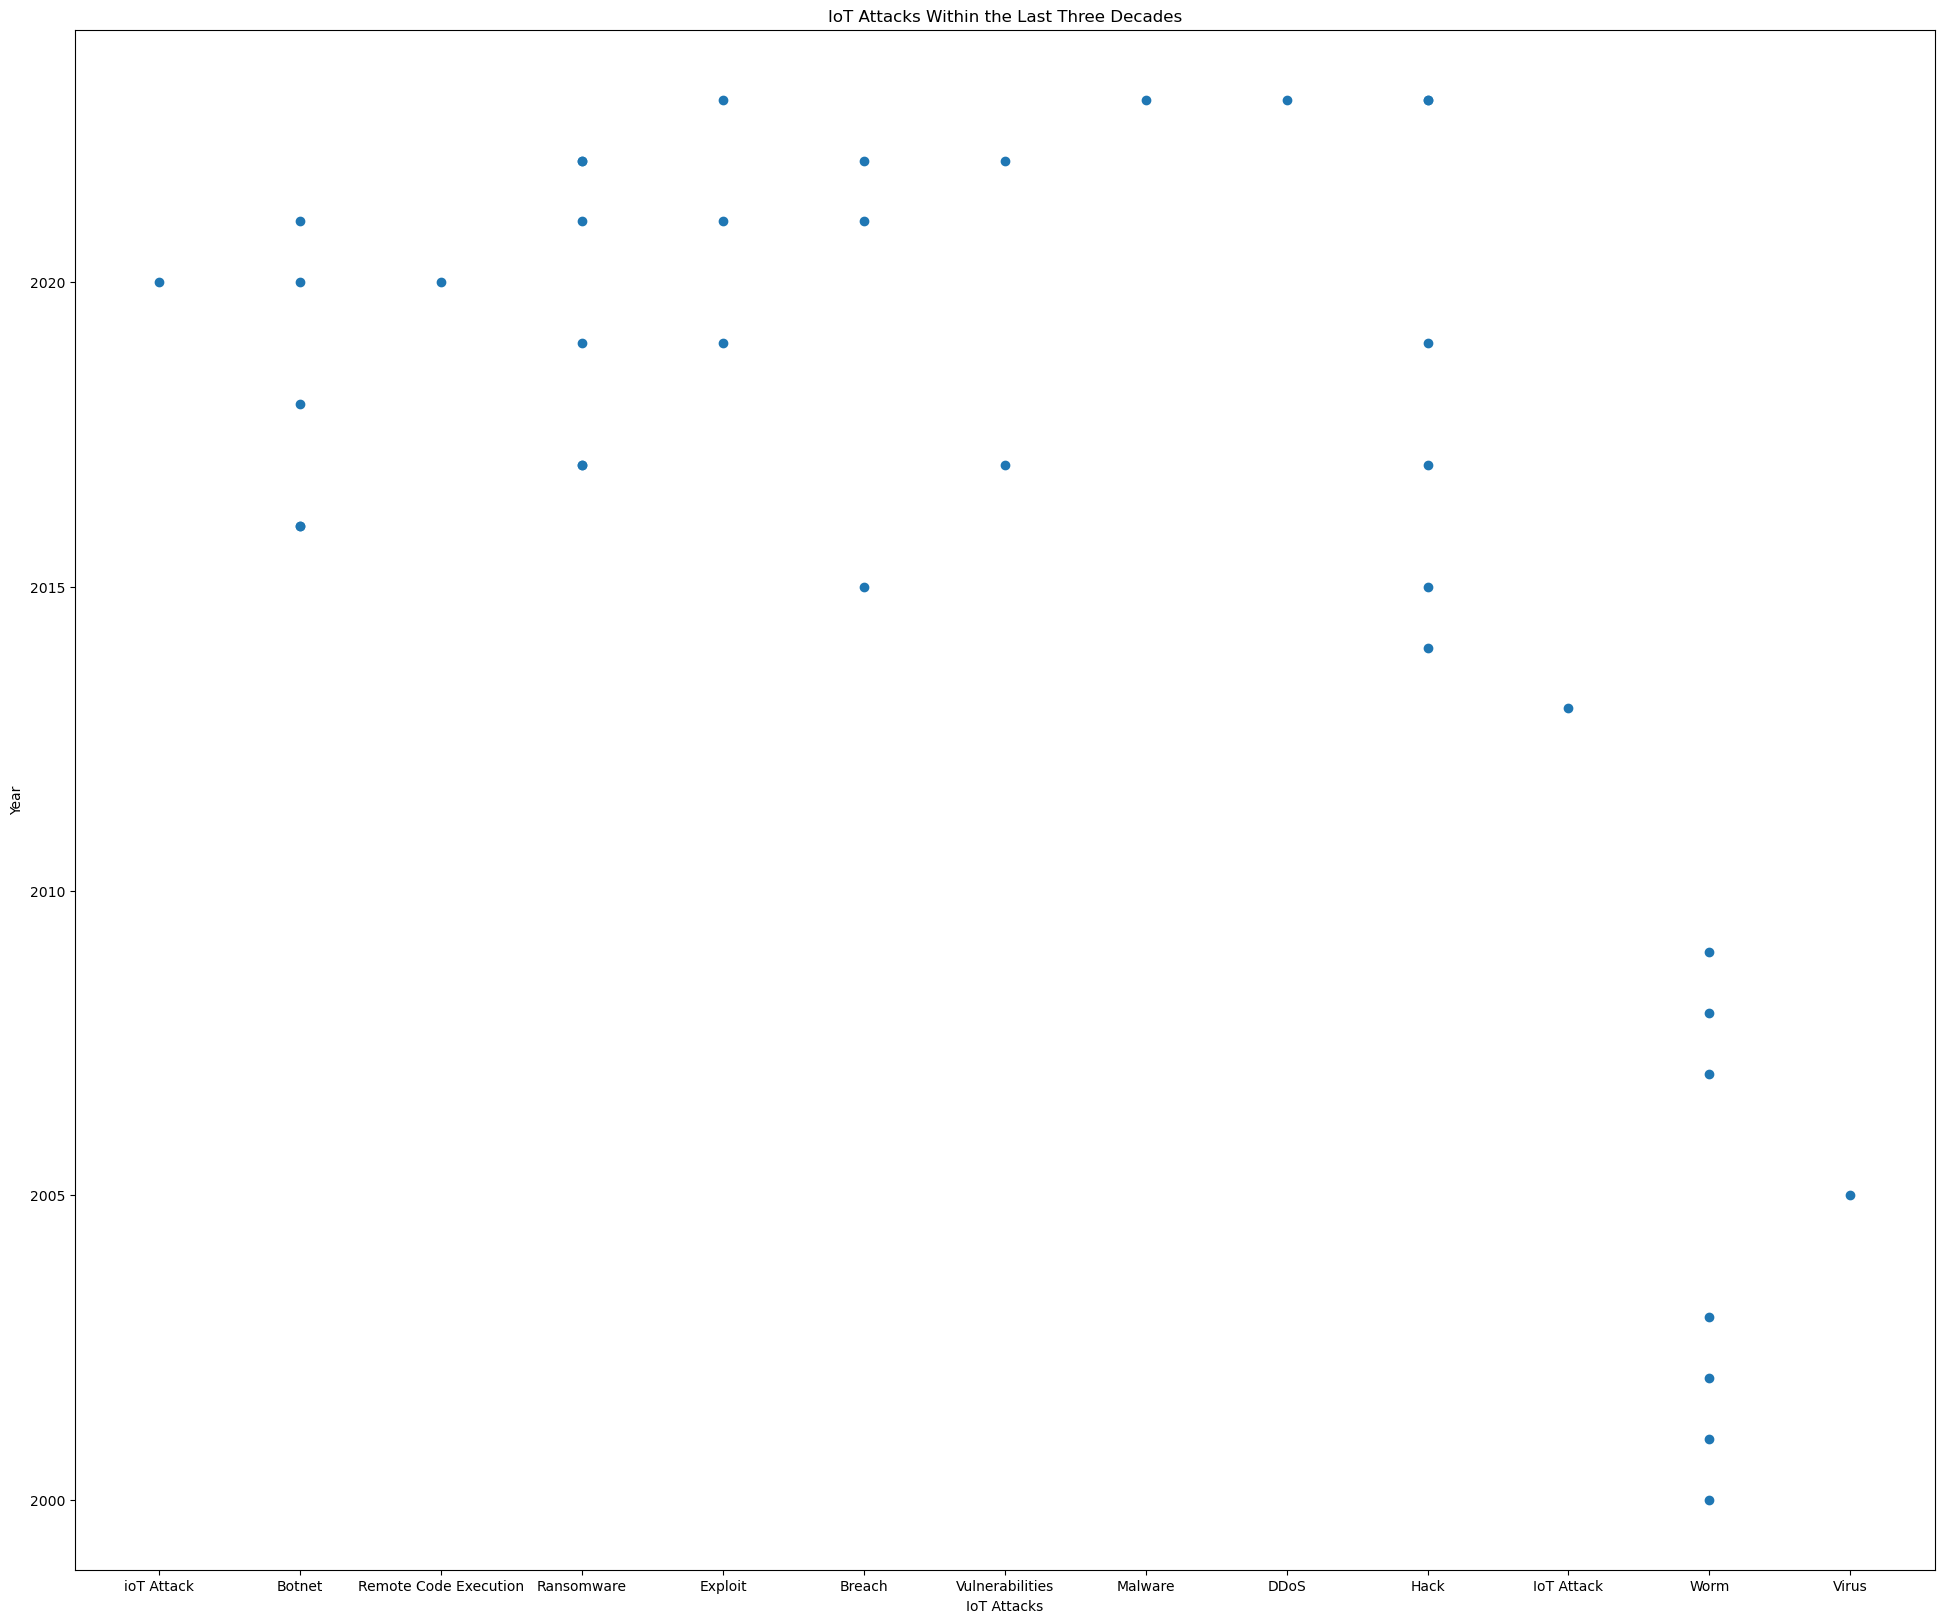

In [19]:
x = df['Attack_1']
y =  df['Year']

plt.figure(figsize=(24, 20))
plt.scatter(x, y)
plt.title('IoT Attacks Within the Last Three Decades')
plt.xlabel('IoT Attacks')
plt.ylabel('Year')
plt.show()

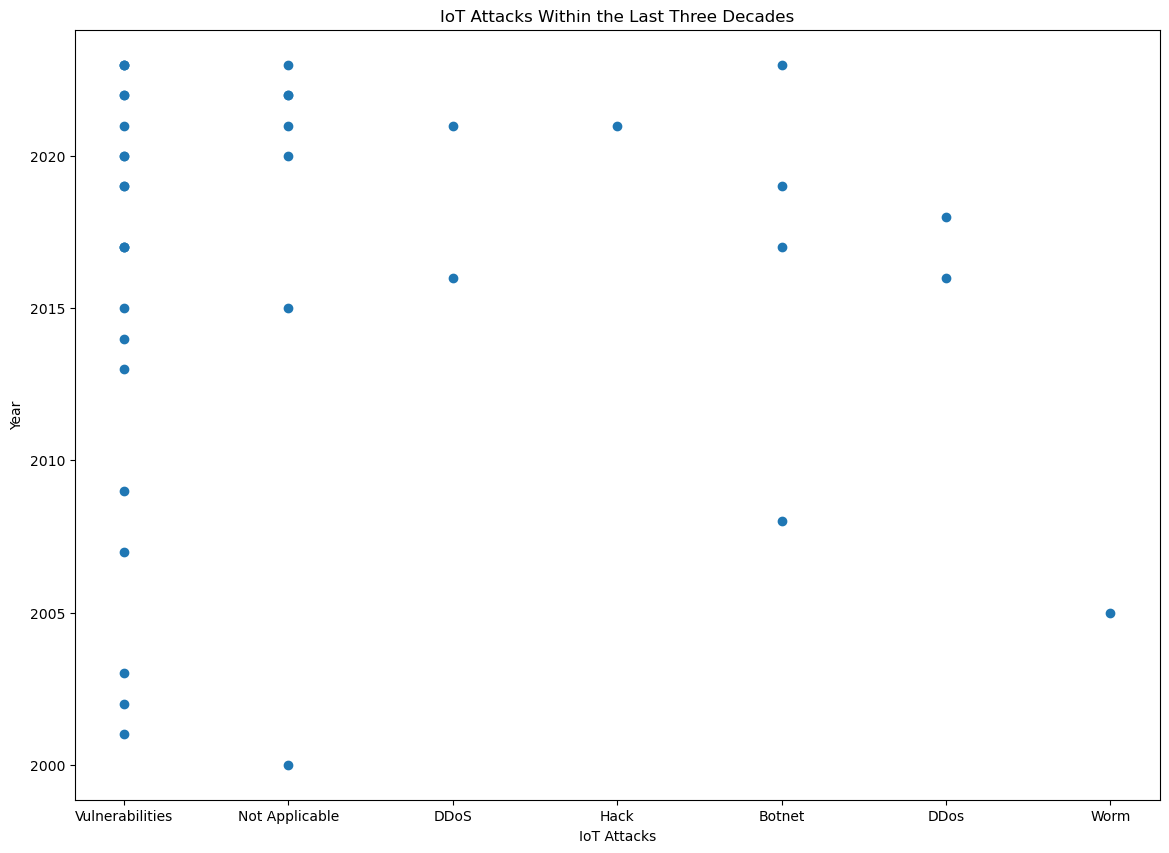

In [20]:
x = df['Attack_2']
y =  df['Year']

plt.figure(figsize=(14, 10))
plt.scatter(x, y)
plt.title('IoT Attacks Within the Last Three Decades')
plt.xlabel('IoT Attacks')
plt.ylabel('Year')
plt.show()

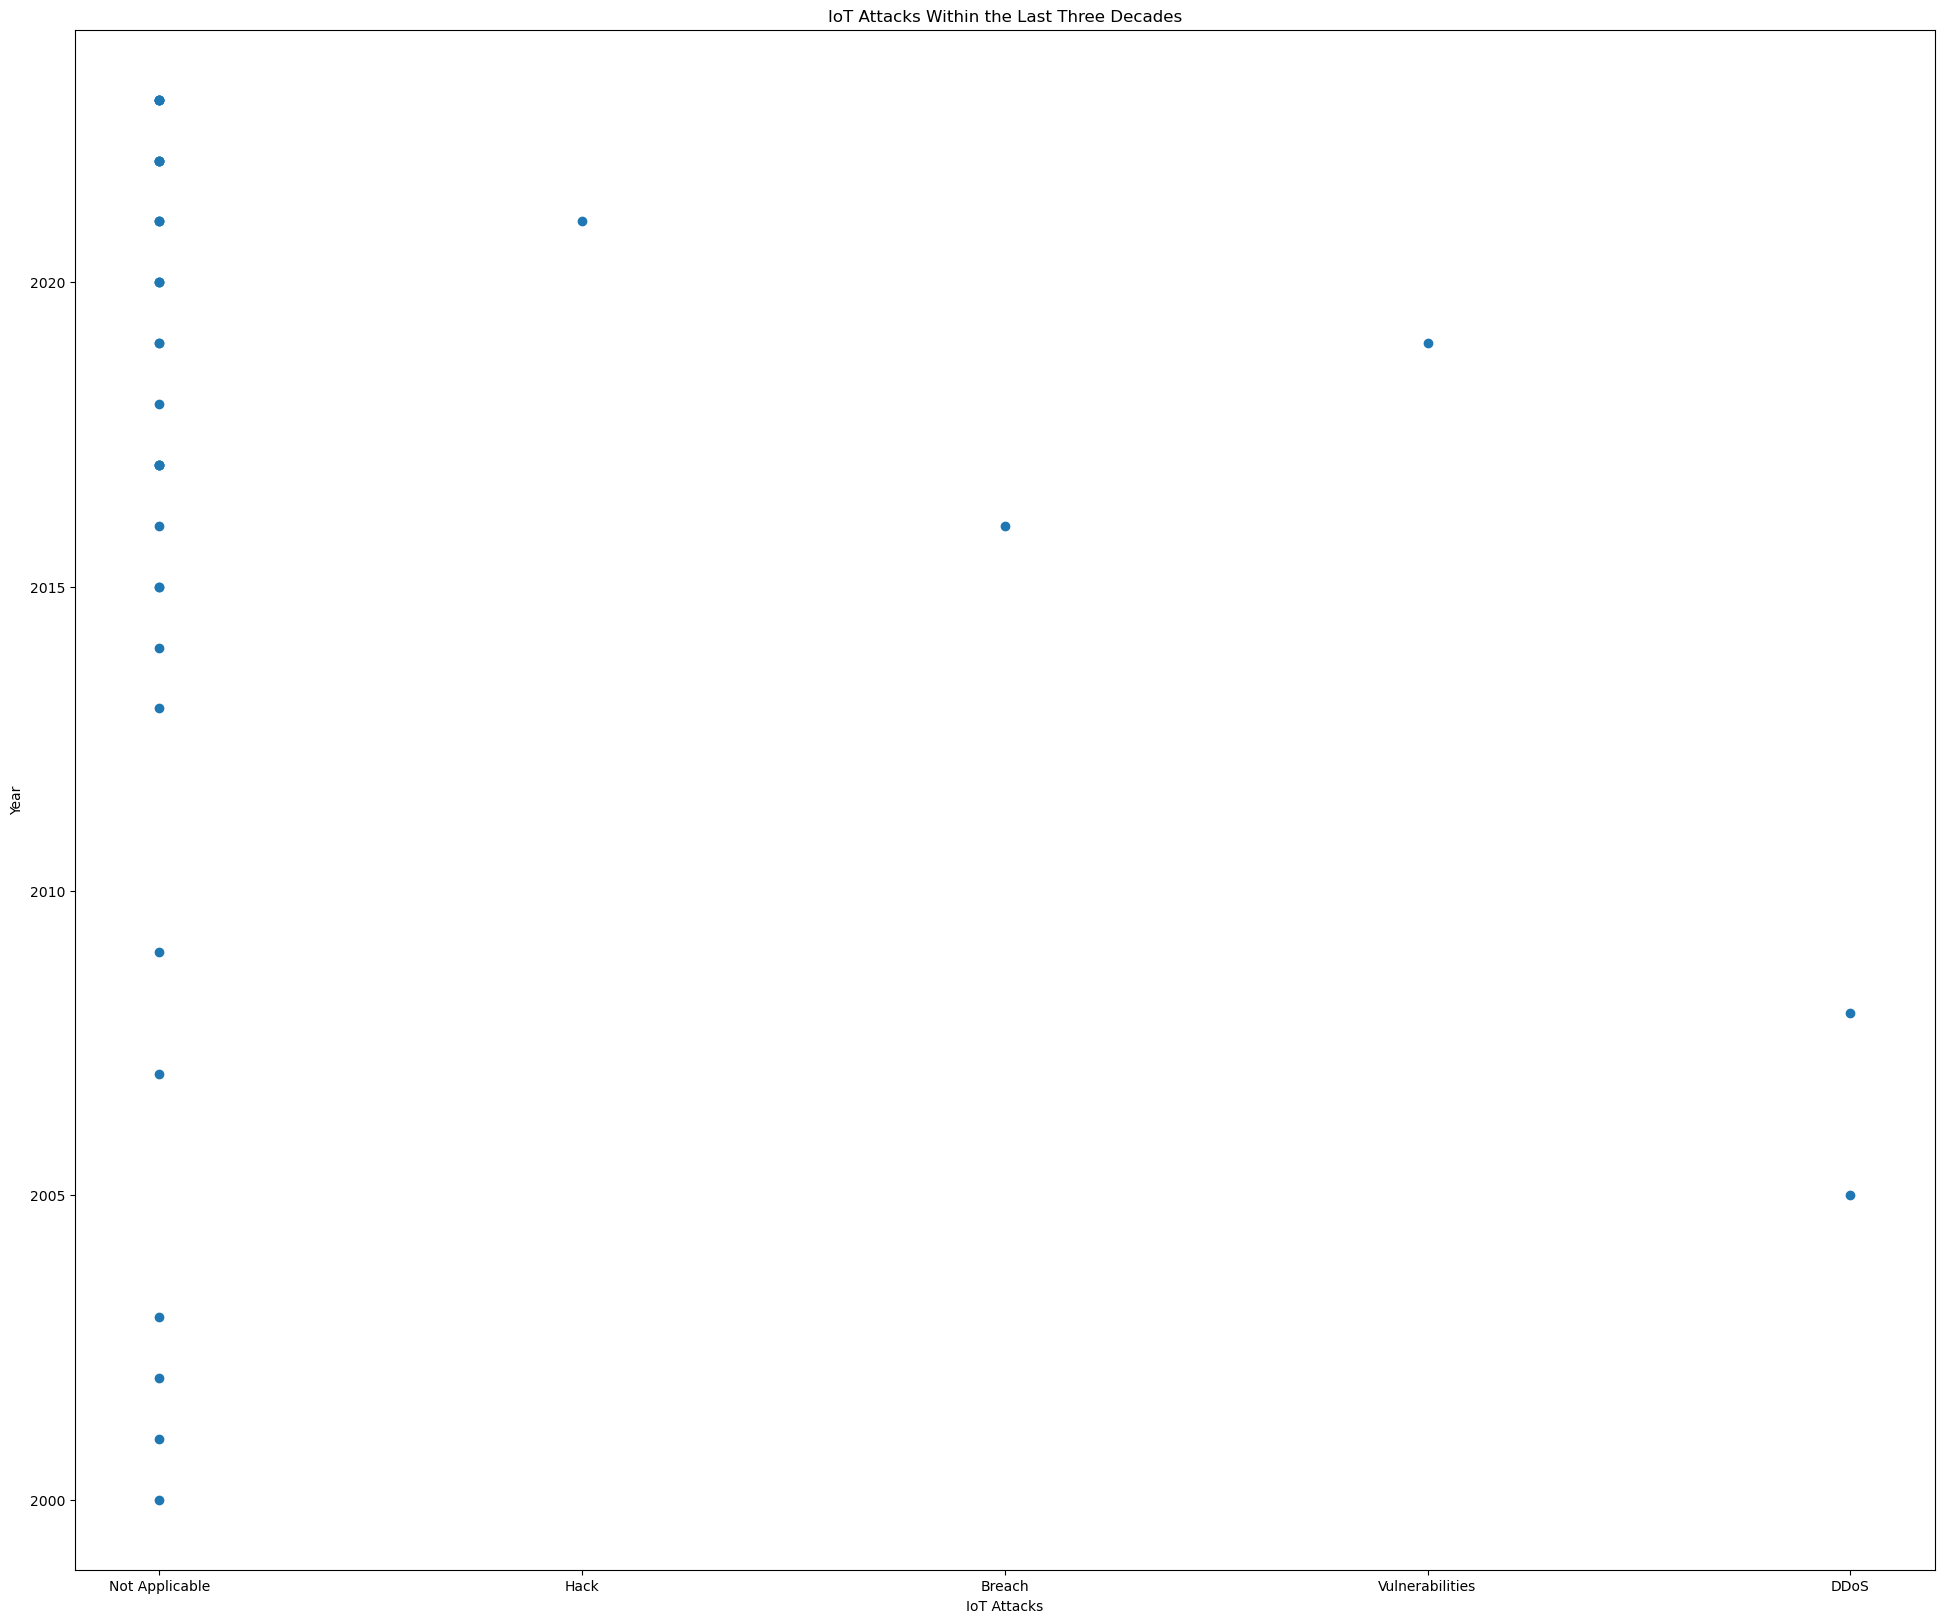

In [22]:
x = df['Attack_3']
y =  df['Year']

plt.figure(figsize=(24, 20))
plt.scatter(x, y)
plt.title('IoT Attacks Within the Last Three Decades')
plt.xlabel('IoT Attacks')
plt.ylabel('Year')
plt.show()

In [24]:
#one-hot encoding for Attack 1 column

df = pd.concat([df, pd.get_dummies(df["Attack_1"],prefix="Attk1", dtype=int)], axis=1)


print(df)

    Year  Attack_ID                                        Attack_Name  \
0   2020   Attack 1                             EternalBlue IoT Attack   
1   2020   Attack 2                                 Android IoT Botnet   
2   2020   Attack 3                  RCE in Smart Cameras (Ring, Wyze)   
3   2021   Attack 4                Colonial Pipeline Ransomware Attack   
4   2021   Attack 5                              Reolink Camera Botnet   
5   2021   Attack 6               Volkswagen IoT Exploit (Car Hacking)   
6   2021   Attack 7                        Zoombombing via IoT Devices   
7   2022   Attack 8                              Casper IoT Ransomware   
8   2022   Attack 9         Hack of IoT Devices in Hospitals (Medjack)   
9   2022  Attack 10            Ransomware Attack on IoT Infrastructure   
10  2022  Attack 11                      MedeAnalytics IoT Data Breach   
11  2023  Attack 12           Malicious Firmware Attack on IoT Devices   
12  2023  Attack 13                   

In [27]:
#one-hot encoding for Attack 2 column

df = pd.concat([df, pd.get_dummies(df["Attack_2"],prefix="Attk2", dtype=int)], axis=1)


print(df)

    Year  Attack_ID                                        Attack_Name  \
0   2020   Attack 1                             EternalBlue IoT Attack   
1   2020   Attack 2                                 Android IoT Botnet   
2   2020   Attack 3                  RCE in Smart Cameras (Ring, Wyze)   
3   2021   Attack 4                Colonial Pipeline Ransomware Attack   
4   2021   Attack 5                              Reolink Camera Botnet   
5   2021   Attack 6               Volkswagen IoT Exploit (Car Hacking)   
6   2021   Attack 7                        Zoombombing via IoT Devices   
7   2022   Attack 8                              Casper IoT Ransomware   
8   2022   Attack 9         Hack of IoT Devices in Hospitals (Medjack)   
9   2022  Attack 10            Ransomware Attack on IoT Infrastructure   
10  2022  Attack 11                      MedeAnalytics IoT Data Breach   
11  2023  Attack 12           Malicious Firmware Attack on IoT Devices   
12  2023  Attack 13                   

In [29]:
#one-hot encoding for Attack 3 column

df = pd.concat([df, pd.get_dummies(df["Attack_3"],prefix="Attk3", dtype=int)], axis=1)


print(df)

    Year  Attack_ID                                        Attack_Name  \
0   2020   Attack 1                             EternalBlue IoT Attack   
1   2020   Attack 2                                 Android IoT Botnet   
2   2020   Attack 3                  RCE in Smart Cameras (Ring, Wyze)   
3   2021   Attack 4                Colonial Pipeline Ransomware Attack   
4   2021   Attack 5                              Reolink Camera Botnet   
5   2021   Attack 6               Volkswagen IoT Exploit (Car Hacking)   
6   2021   Attack 7                        Zoombombing via IoT Devices   
7   2022   Attack 8                              Casper IoT Ransomware   
8   2022   Attack 9         Hack of IoT Devices in Hospitals (Medjack)   
9   2022  Attack 10            Ransomware Attack on IoT Infrastructure   
10  2022  Attack 11                      MedeAnalytics IoT Data Breach   
11  2023  Attack 12           Malicious Firmware Attack on IoT Devices   
12  2023  Attack 13                   

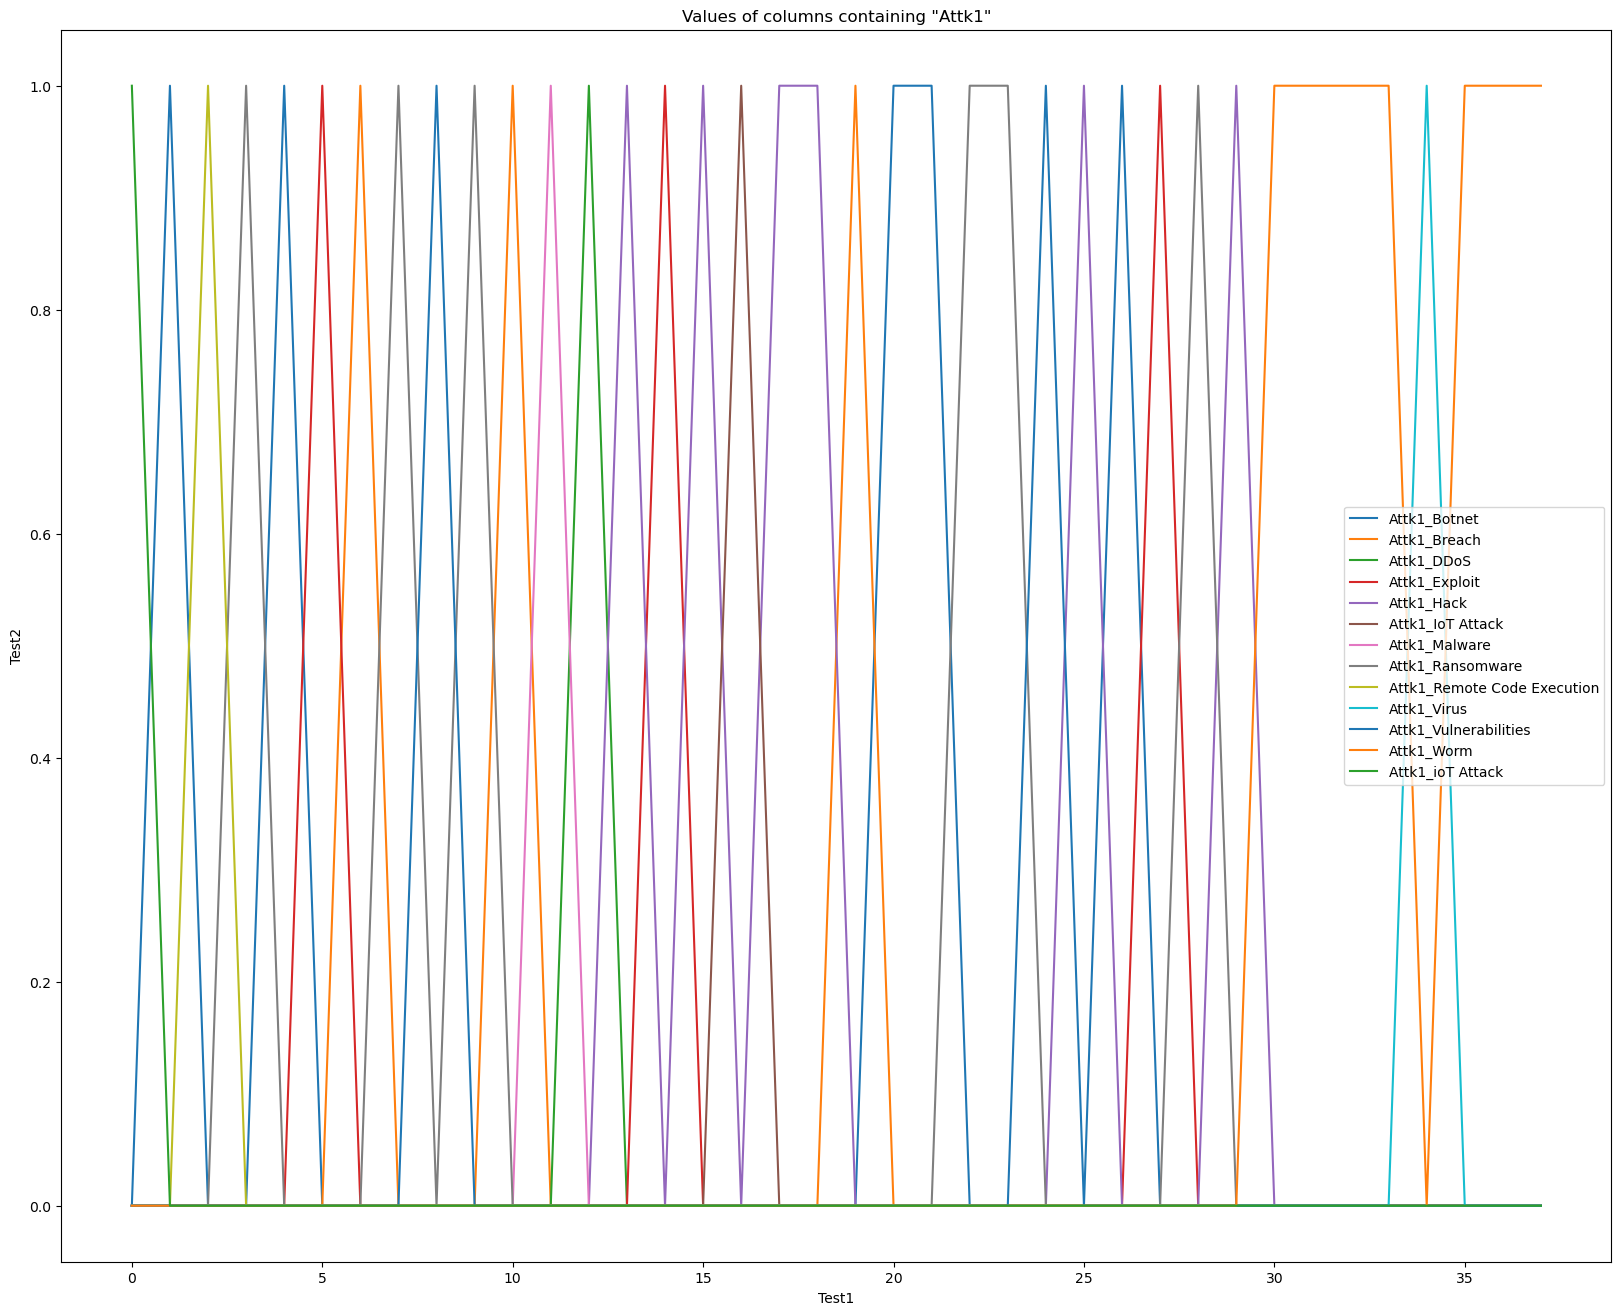

In [69]:
keyword = 'Attk1'  # The word to search for in column titles

# Select columns containing the keyword
columns_to_plot = [col for col in df.columns if keyword in col]

# Check if any columns were found
if columns_to_plot:
    # Plotting
    plt.figure(figsize=(20, 16))
    
    for column in columns_to_plot:
        plt.plot(df.index, df[column], label=column)  # Plot each selected column

    
    plt.xlabel('Test1')
    plt.ylabel('Test2')
    plt.title(f'Values of columns containing "{keyword}"')
    plt.legend()
    plt.show()
else:
    print(f"No columns found with the keyword '{keyword}'.")

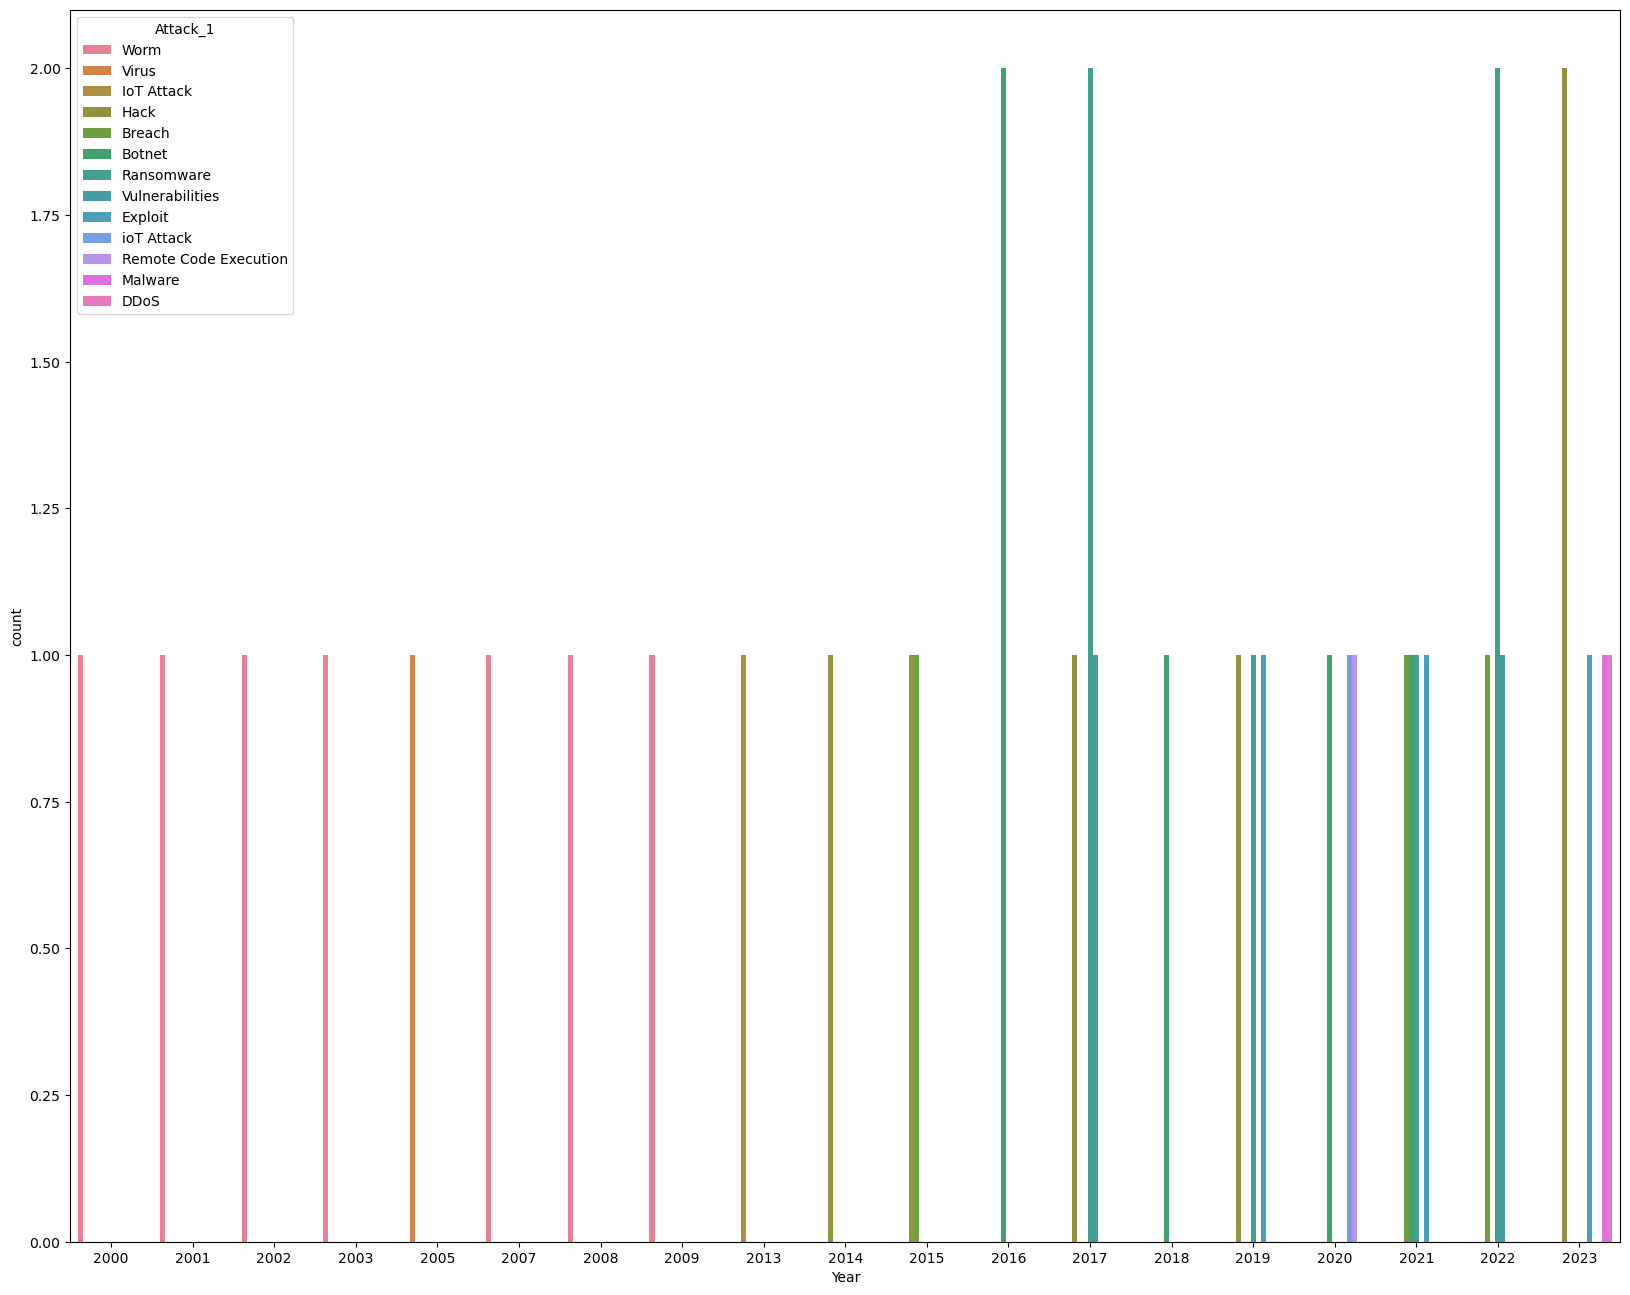

In [33]:
#count plot to show distribuiton of remote work relating to performance rating 

plt.figure(figsize=(20, 16))
sns.countplot(data=df, x="Year", hue="Attack_1")
plt.show()

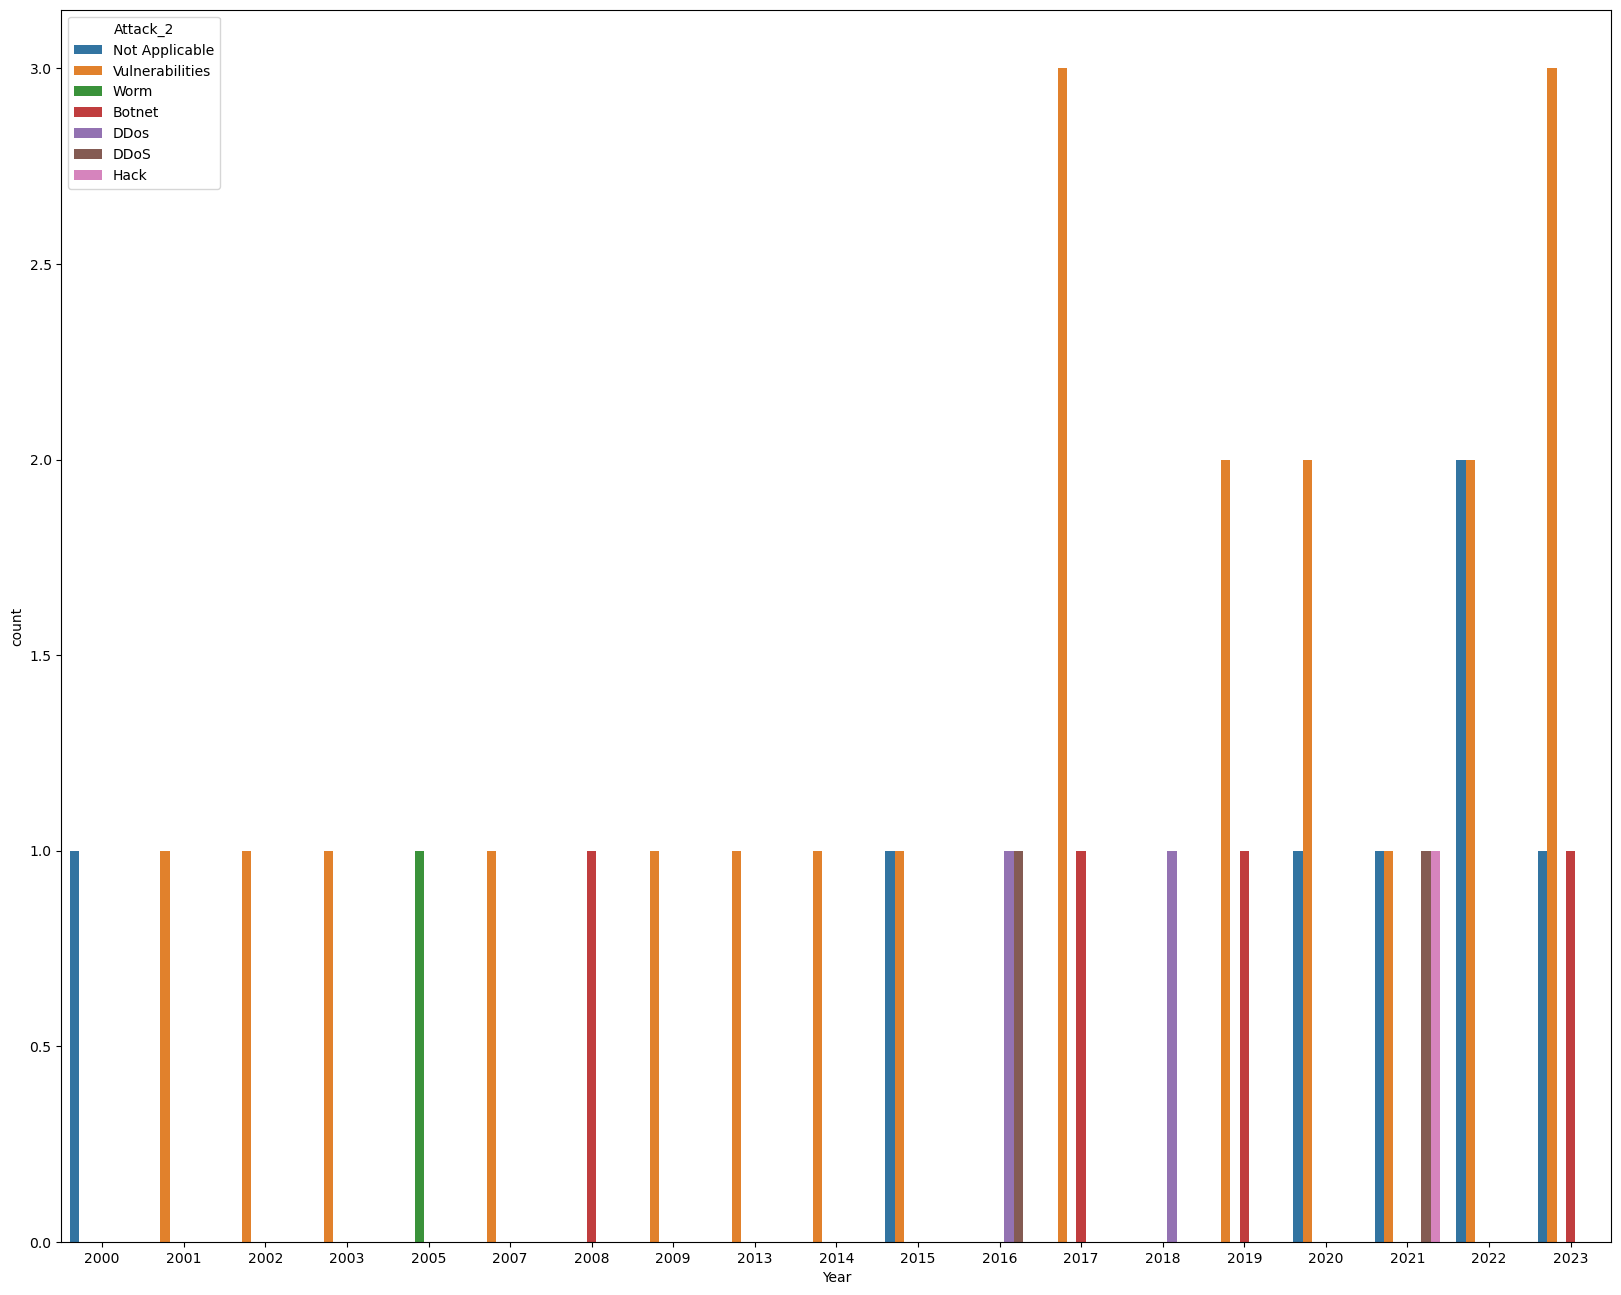

In [34]:
plt.figure(figsize=(20, 16))
sns.countplot(data=df, x="Year", hue="Attack_2")
plt.show()

In [1]:
#distribution(s)

#count plot to depict distribution of attack_1(s)

plt.figure(figsize=(12, 10))
df['Attack_1'].value_counts().plot(kind='bar')

plt.xlabel('Leading Attack')
plt.ylabel('Frequency')
plt.title('Distribution of Leading Attack(s)')


plt.show()



NameError: name 'plt' is not defined

In [45]:
#define category for logistic regression

print(df.columns)

Index(['Year', 'Attack_ID', 'Attack_Name', 'Reason for Attack', 'Attack_1',
       'Attack_2', 'Attack_3', 'Solution_1', 'Solution_2', 'Solution_3',
       'Solution_4', 'Solution_5', 'Solution_6', 'Solution_7', 'Attk1_Botnet',
       'Attk1_Breach', 'Attk1_DDoS', 'Attk1_Exploit', 'Attk1_Hack',
       'Attk1_IoT Attack', 'Attk1_Malware', 'Attk1_Ransomware',
       'Attk1_Remote Code Execution', 'Attk1_Virus', 'Attk1_Vulnerabilities',
       'Attk1_Worm', 'Attk1_ioT Attack', 'Attk2_Botnet', 'Attk2_DDoS',
       'Attk2_DDos', 'Attk2_Hack', 'Attk2_Not Applicable',
       'Attk2_Vulnerabilities', 'Attk2_Worm', 'Attk3_Breach', 'Attk3_DDoS',
       'Attk3_Hack', 'Attk3_Not Applicable', 'Attk3_Vulnerabilities'],
      dtype='object')


      Attk1_Botnet  Attk1_Breach  Attk1_DDoS  Attk1_Exploit  Attk1_Hack  \
0.25           0.0           0.0         0.0            0.0         0.0   
0.50           0.0           0.0         0.0            0.0         0.0   
0.75           0.0           0.0         0.0            0.0         0.0   

      Attk1_IoT Attack  Attk1_Malware  Attk1_Ransomware  \
0.25               0.0            0.0               0.0   
0.50               0.0            0.0               0.0   
0.75               0.0            0.0               0.0   

      Attk1_Remote Code Execution  Attk1_Virus  ...  Attk2_Botnet  Attk2_DDoS  \
0.25                          0.0          0.0  ...           0.0         0.0   
0.50                          0.0          0.0  ...           0.0         0.0   
0.75                          0.0          0.0  ...           0.0         0.0   

      Attk2_DDos  Attk2_Hack  Attk2_Vulnerabilities  Attk2_Worm  Attk3_Breach  \
0.25         0.0         0.0                    0.0     

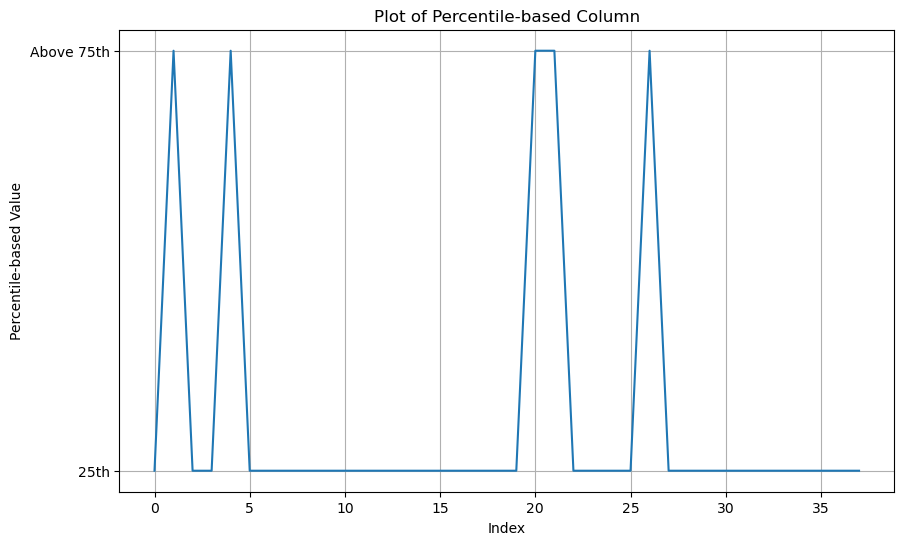

    Year  Attack_ID                                        Attack_Name  \
0   2020   Attack 1                             EternalBlue IoT Attack   
1   2020   Attack 2                                 Android IoT Botnet   
2   2020   Attack 3                  RCE in Smart Cameras (Ring, Wyze)   
3   2021   Attack 4                Colonial Pipeline Ransomware Attack   
4   2021   Attack 5                              Reolink Camera Botnet   
5   2021   Attack 6               Volkswagen IoT Exploit (Car Hacking)   
6   2021   Attack 7                        Zoombombing via IoT Devices   
7   2022   Attack 8                              Casper IoT Ransomware   
8   2022   Attack 9         Hack of IoT Devices in Hospitals (Medjack)   
9   2022  Attack 10            Ransomware Attack on IoT Infrastructure   
10  2022  Attack 11                      MedeAnalytics IoT Data Breach   
11  2023  Attack 12           Malicious Firmware Attack on IoT Devices   
12  2023  Attack 13                   

In [97]:

# Specify the columns for which to calculate percentiles

anlz_cols = ['Attk1_Botnet','Attk1_Breach', 'Attk1_DDoS', 'Attk1_Exploit', 'Attk1_Hack','Attk1_IoT Attack', 'Attk1_Malware', 'Attk1_Ransomware','Attk1_Remote Code Execution', 'Attk1_Virus', 'Attk1_Vulnerabilities','Attk1_Worm', 'Attk1_ioT Attack', 'Attk2_Botnet', 'Attk2_DDoS','Attk2_DDos', 'Attk2_Hack','Attk2_Vulnerabilities', 'Attk2_Worm', 'Attk3_Breach', 'Attk3_DDoS','Attk3_Hack', 'Attk3_Vulnerabilities']
# Calculate the 25th, 50th, and 75th percentiles

percentiles = df[anlz_cols].quantile([0.25, 0.5, 0.75])

# Display the result
print(percentiles)


def assign_percentile(row, percentiles):
    for col in anlz_cols:
        if row[col] <= percentiles[col][0.25]:
            return '25th'
        elif row[col] <= percentiles[col][0.5]:
            return '50th'
        elif row[col] <= percentiles[col][0.75]:
            return '75th'
        else:
            return 'Above 75th'



df['Attack_Percentile'] = df.apply(assign_percentile, axis=1, percentiles=percentiles)

# Plot the new column
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Attack_Percentile'])
plt.xlabel('Index')
plt.ylabel('Percentile-based Value')
plt.title('Plot of Percentile-based Column')
plt.grid(True)
plt.show()

print(df)

      Attk1_Botnet  Attk1_Breach  Attk1_DDoS  Attk1_Exploit  Attk1_Hack  \
0.25           0.0           0.0         0.0            0.0         0.0   
0.50           0.0           0.0         0.0            0.0         0.0   
0.75           0.0           0.0         0.0            0.0         0.0   

      Attk1_IoT Attack  Attk1_Malware  Attk1_Ransomware  \
0.25               0.0            0.0               0.0   
0.50               0.0            0.0               0.0   
0.75               0.0            0.0               0.0   

      Attk1_Remote Code Execution  Attk1_Virus  ...  Attk2_Botnet  Attk2_DDoS  \
0.25                          0.0          0.0  ...           0.0         0.0   
0.50                          0.0          0.0  ...           0.0         0.0   
0.75                          0.0          0.0  ...           0.0         0.0   

      Attk2_DDos  Attk2_Hack  Attk2_Vulnerabilities  Attk2_Worm  Attk3_Breach  \
0.25         0.0         0.0                    0.0     

<Figure size 2000x1600 with 0 Axes>

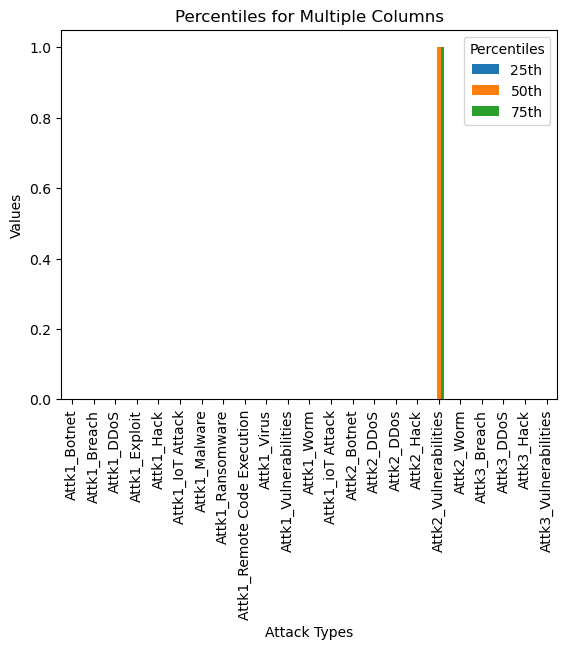

In [93]:
# Specify the columns for which to calculate percentiles

anlz_cols_2 = ['Attk1_Botnet','Attk1_Breach', 'Attk1_DDoS', 'Attk1_Exploit', 'Attk1_Hack','Attk1_IoT Attack', 'Attk1_Malware', 'Attk1_Ransomware','Attk1_Remote Code Execution', 'Attk1_Virus', 'Attk1_Vulnerabilities','Attk1_Worm', 'Attk1_ioT Attack', 'Attk2_Botnet', 'Attk2_DDoS','Attk2_DDos', 'Attk2_Hack','Attk2_Vulnerabilities', 'Attk2_Worm', 'Attk3_Breach', 'Attk3_DDoS','Attk3_Hack', 'Attk3_Vulnerabilities']
# Calculate the 25th, 50th, and 75th percentiles

percentiles_1 = df[anlz_cols_2].quantile([0.25, 0.5, 0.75])

# Display the result
print(percentiles_1)

# Transpose the DataFrame to have percentiles as columns
percentiles_1 = percentiles_1.T

# Plot the percentiles
plt.figure(figsize=(20, 16))
percentiles_1.plot(kind='bar')
plt.title('Percentiles for Multiple Columns')
plt.xlabel('Attack Types')
plt.ylabel('Values')
plt.legend(title='Percentiles', labels=['25th', '50th', '75th'])
plt.show()

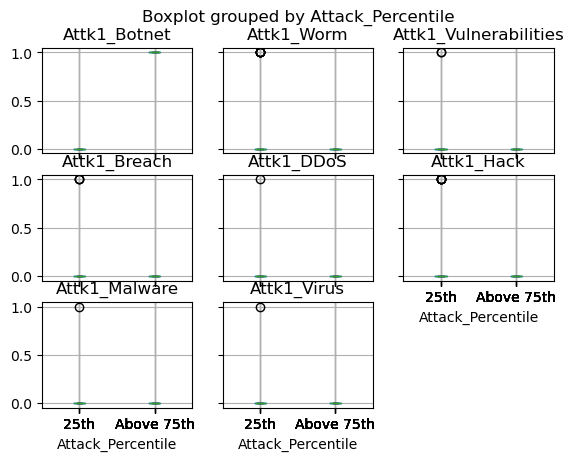

<Figure size 2000x1600 with 0 Axes>

In [131]:
# create boxplot for Attck_1 feature grouped by Percentile


df.boxplot(column=['Attk1_Botnet', 'Attk1_Worm', 'Attk1_Vulnerabilities', 'Attk1_Breach', 'Attk1_DDoS', 'Attk1_Hack', 'Attk1_Malware', 'Attk1_Virus'], by='Attack_Percentile')
plt.figure(figsize=(20, 16))
plt.show()

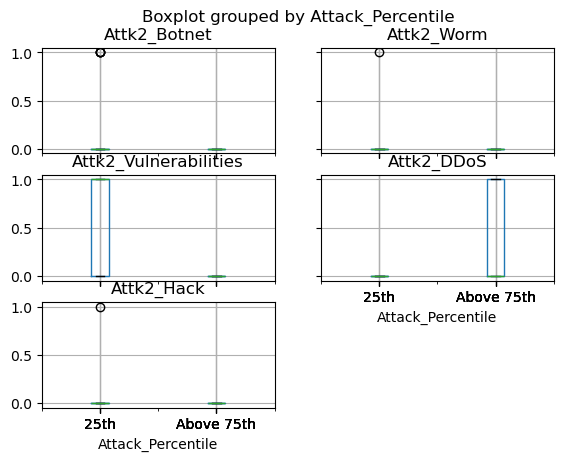

<Figure size 2000x1600 with 0 Axes>

In [133]:
# create boxplot for Attck_2 feature grouped by Percentile


df.boxplot(column=['Attk2_Botnet', 'Attk2_Worm', 'Attk2_Vulnerabilities', 'Attk2_DDoS', 'Attk2_Hack' ], by='Attack_Percentile')
plt.figure(figsize=(20, 16))
plt.show()

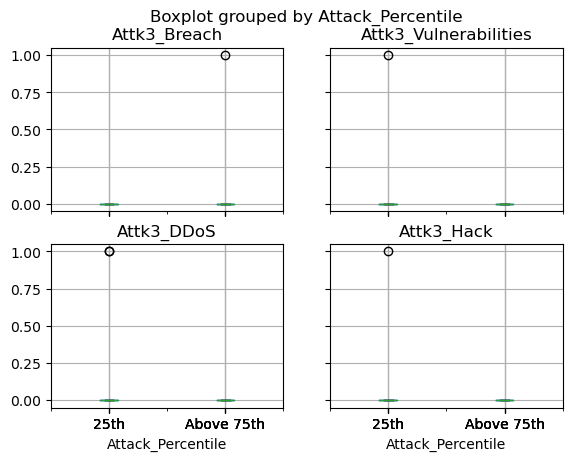

<Figure size 2000x1600 with 0 Axes>

In [135]:
# create boxplot for Attck_3 feature grouped by Percentile


df.boxplot(column=['Attk3_Breach', 'Attk3_Vulnerabilities', 'Attk3_DDoS', 'Attk3_Hack' ], by='Attack_Percentile')
plt.figure(figsize=(20, 16))
plt.show()

Attack_ID                      int64
Attk1_Botnet                   int64
Attk1_Breach                   int64
Attk1_DDoS                     int64
Attk1_Exploit                  int64
Attk1_Hack                     int64
Attk1_IoT Attack               int64
Attk1_Malware                  int64
Attk1_Ransomware               int64
Attk1_Remote Code Execution    int64
Attk1_Virus                    int64
Attk1_Vulnerabilities          int64
Attk1_Worm                     int64
Attk1_ioT Attack               int64
Attk2_Botnet                   int64
Attk2_DDoS                     int64
Attk2_DDos                     int64
Attk2_Hack                     int64
Attk2_Vulnerabilities          int64
Attk2_Worm                     int64
Attk3_Breach                   int64
Attk3_DDoS                     int64
Attk3_Hack                     int64
Attk3_Vulnerabilities          int64
dtype: object
Coefficients: [[-0.04930717  1.425838   -0.15003554 -0.15609122 -0.10121214 -0.23587405
  -0.07501

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


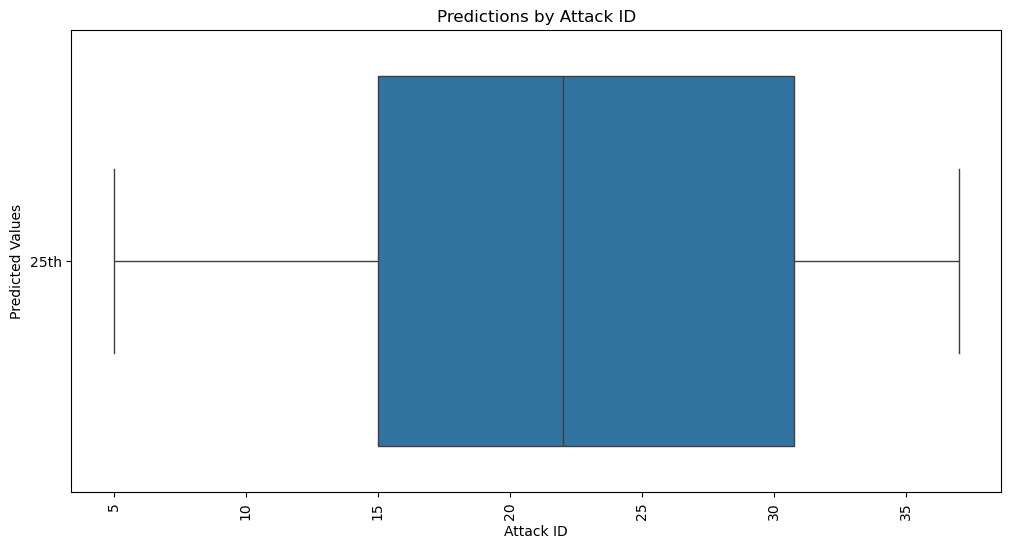

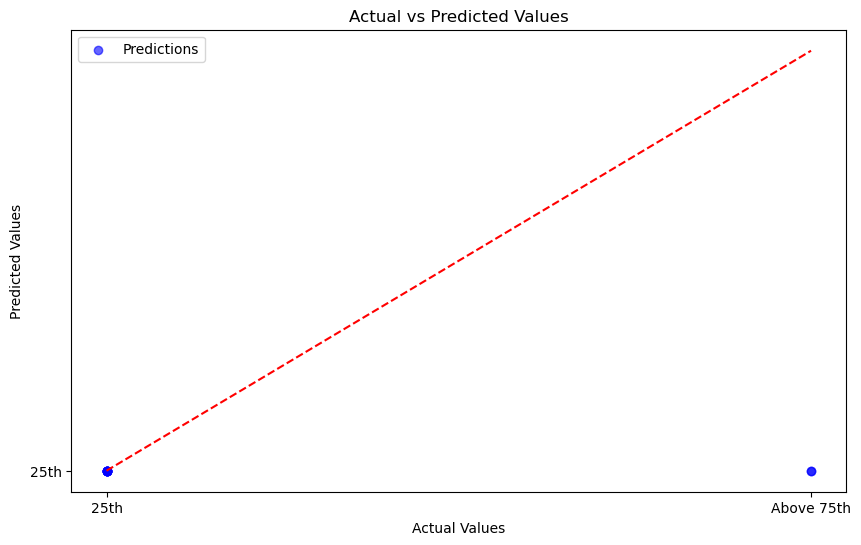

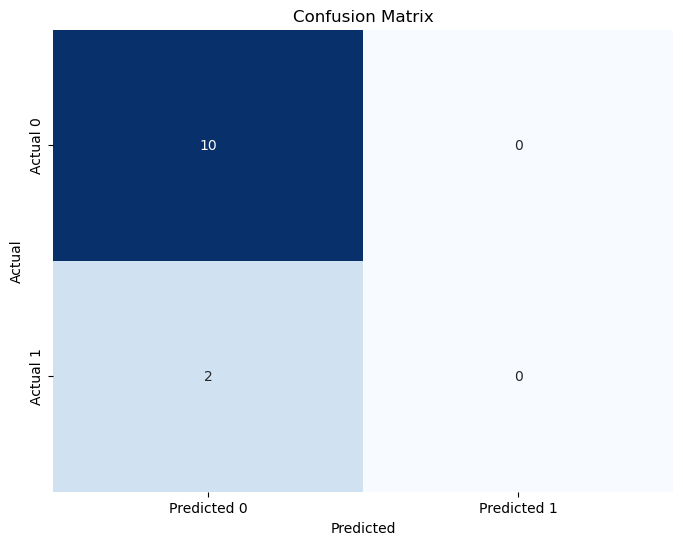

In [153]:
#Implement a logistic regression model to predict chance of attack happening again


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Attack_ID'] = label_encoder.fit_transform(df['Attack_ID'])

# Check data types
print(df[features].dtypes)

#create the features
features = ['Attack_ID','Attk1_Botnet','Attk1_Breach', 'Attk1_DDoS', 'Attk1_Exploit', 'Attk1_Hack','Attk1_IoT Attack', 'Attk1_Malware', 'Attk1_Ransomware','Attk1_Remote Code Execution', 'Attk1_Virus', 'Attk1_Vulnerabilities','Attk1_Worm', 'Attk1_ioT Attack', 'Attk2_Botnet', 'Attk2_DDoS','Attk2_DDos', 'Attk2_Hack','Attk2_Vulnerabilities', 'Attk2_Worm', 'Attk3_Breach', 'Attk3_DDoS','Attk3_Hack', 'Attk3_Vulnerabilities']

#train the model
X = df[features]
y = df['Attack_Percentile']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


# Get the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make predictions using coefficients and intercept manually
def predict_manually(row, coefficients, intercept):
    linear_combination = intercept
    for i in range(len(row)):
        linear_combination += coefficients[0][i] * row[i]
    probability = 1 / (1 + np.exp(-linear_combination))
    return 1 if probability >= 0.5 else 0


# Make predictions 
new_data_pred = model.predict(X)
print("Predictions on new data:", new_data_pred)

# Create df to associate features with predictions
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred
results_df['Probability'] = y_proba 



results_df['Attack_ID'] = df.loc[X_test.index, 'Attack_ID']

# Display predictions along with features
print(results_df.head(10))

#calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:", conf_matrix)

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:", class_report)



# Plotting predictions based on Attack_ID
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack_ID', y='Predicted', data=results_df)
plt.title('Predictions by Attack ID')
plt.xlabel('Attack ID')
plt.ylabel('Predicted Values')
plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
plt.show()

# 1. Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (perfect predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# 2. Plot the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


